<a href="https://colab.research.google.com/github/Git-Codder/Heart-Disease-Prediction/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='Moderate'> Heart Disease Prediction Machine Learning Project

# <font color='Red'> Data Preprocessing (Data Science Part)

---



## Initial Processing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

### Importing the Datasets

In [2]:
df = pd.read_csv('heart.csv')

## Data Visualization

### To visualise and read the dataset 

To know more -> [Click Here](https://datacarpentry.org/python-ecology-lesson/02-starting-with-data/index.html)


In [3]:
#Function to Print the value together
def countUniqType(dataset) :
  dataList = []
  colName = list(dataset.columns.values)
  for i in colName : 
    temp = []
    temp = [i,dataset[i].nunique(),dataset[i].isnull().sum(),dataset[i].dtypes]
    dataList.append(temp)

  #changing 2-d list to dataframe
  df_data = pd.DataFrame(dataList)
  # df_data = df_data.transpose()
  df_data.columns = ["Column Name", "Unique Value ", "Missing Value", "Data Type"]
  print(df_data)

  return 

#function for read and analysis the dataset
def read_and_analysis(data) :
  print(" Data : ")
  print(data.head())
  print()
  print(40 * '*')
  print("Data Shape : ",data.shape)
  print()
  print(40 * '*')
  print()
  print(40 * '*')
  
  return 

In [4]:
read_and_analysis(df)
countUniqType(df)
# print(df.values)

 Data : 
   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   52    1   0       125   212    0  ...      0      1.0      2   2     3       0
1   53    1   0       140   203    1  ...      1      3.1      0   0     3       0
2   70    1   0       145   174    0  ...      1      2.6      0   0     3       0
3   61    1   0       148   203    0  ...      0      0.0      2   1     3       0
4   62    0   0       138   294    1  ...      0      1.9      1   3     2       0

[5 rows x 14 columns]

****************************************
Data Shape :  (1025, 14)

****************************************

****************************************
   Column Name  Unique Value   Missing Value Data Type
0          age             41              0     int64
1          sex              2              0     int64
2           cp              4              0     int64
3     trestbps             49              0     int64
4         chol            152              0

### Functions



#### Function for Print Confusion Matrics
To know more -> [Click Here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)


In [5]:
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.show()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


# To Call the Function
# plot_confusion_matrix(cm, classes=['FirstClass', 'SecondClass'])

## Data Handling

### droping coulumns (Using unique value strategy) (May be a Bad Stratgey)

In [6]:
# Function to drop the column which has unique value less than 1% of the datset row
def dropByuniqu(dataset) : 
  colName = list(dataset.columns.values)
  onepercent = (dataset.shape[0])//100;
  for i in colName : 
    if(dataset[i].nunique() < onepercent) : 
      dataset.drop(i,axis=1,inplace=True)

  return 

# Function to drop the columns which has missing value greter than 99% of the dataset row_count
def dropBymissing(dataset) : 
  colName = list(dataset.columns.values)
  ninetyninepercent = (dataset.shape[0]*99)//100;
  for i in colName : 
    if(dataset[i].isnull().sum() > ninetyninepercent) : 
      dataset.drop(i,axis=1,inplace=True)

  return 


In [7]:
dropBymissing(df)

#drop country column (It does not have any impact on Life Expectancy)
# df.drop('Country',axis=1,inplace=True)

print(df.shape)
print(df.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


### Encoding DataFrame 

In [8]:
# def encode_and_bind(original_dataframe, feature_to_encode):
#   dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
#   original_dataframe.drop(feature_to_encode,axis=1,inplace=True)
#   res = pd.concat([original_dataframe, dummies], axis=1)
#   return(res)
  
# df = encode_and_bind(df,'Status')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Handling missing values in Dataset 

To know more about missing values handling -> [Click Here](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b) 


In [10]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Spliting 

### spliting data in dependent variable and independent variable

In [11]:
x = df.iloc[:,df.columns != 'target'].values
y = df.iloc[:,df.columns == 'target'].values


In [12]:
print(x)

[[52.  1.  0. ...  2.  2.  3.]
 [53.  1.  0. ...  0.  0.  3.]
 [70.  1.  0. ...  0.  0.  3.]
 ...
 [47.  1.  0. ...  1.  1.  2.]
 [50.  0.  0. ...  2.  0.  2.]
 [54.  1.  0. ...  1.  1.  3.]]


In [13]:
print(y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]]


### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 1)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [16]:
df.max()

age          77.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64

In [17]:
df.min()

age          29.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64

***Note*** : here feature scaling does not require cause it has diverse range all of the column not impact of a single feature(Column)

# <font color='Blue'> Classification Model Processing


---



In [18]:
# List to Store all Model r_square value

modelPerformance = [] 
confusionMatrices = [];

## <font color='violate'> ***Logistic Regression***


### Training the Logistic Regression model on the Training set

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making the Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [21]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='maroon'> ***K-NN Model (K Nearest Neighbours)*** **bold text**


### Training the K-NN model on the Training set

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [24]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='Green'> ***Support Vector Classification*** 

### Training the SVM model on the Training set

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [27]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='Orange'> ***Naive Bays***

### Training the Naive Bayes model on the Training set

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

### Making the Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [30]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='red'> ***Kernel SVM***

### Training the Kernel SVM model on the Training set

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Making the Confusion Matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [33]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='Purple'> ***Decision Tree Classification***

### Training the Decision Tree Classification model on the Training set

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

### Making the Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [36]:
modelPerformance.append(accuracy_score(y_test, y_pred))

## <font color='Blue Flower'> ***Random Forest Classification***

### Training the Random Forest Classification model on the Training set

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Making the Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test_scaled)
cm = confusion_matrix(y_test, y_pred)
confusionMatrices.append(cm)

### Evaluating the Model Performance

In [39]:
modelPerformance.append(accuracy_score(y_test, y_pred))

# <font color='Magenta'> Analysing Model Performances 

---



### Preparing Data Of Model Performances 

In [40]:
np.set_printoptions(precision=2)
xLables = ['Logistic','KNN','Support Vector','Naive Bays','Kernel SVM','Decision Tree','Random Forest']

xCord = np.arange(0,1,0.15)
yCord = np.array(modelPerformance)

print(yCord)


[0.8  0.84 0.79 0.77 0.9  1.   1.  ]


## Ploting Confusion Matrics

Logistic Confusion matrix, without normalization


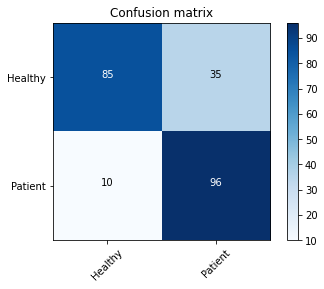

**************************************************
KNN Confusion matrix, without normalization


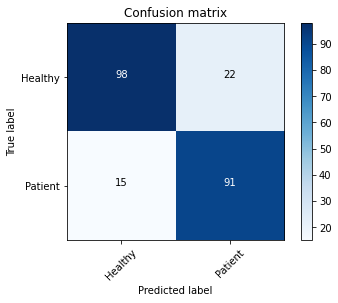

**************************************************
Support Vector Confusion matrix, without normalization


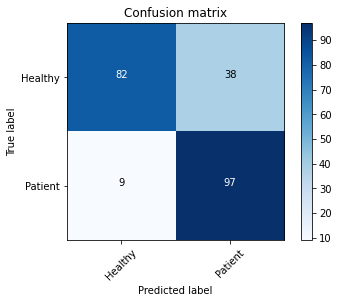

**************************************************
Naive Bays Confusion matrix, without normalization


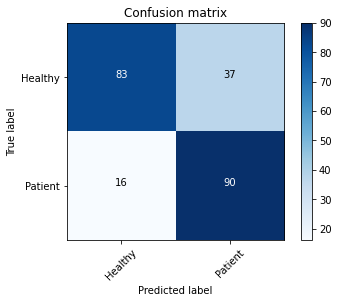

**************************************************
Kernel SVM Confusion matrix, without normalization


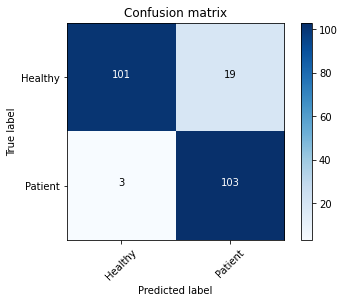

**************************************************
Decision Tree Confusion matrix, without normalization


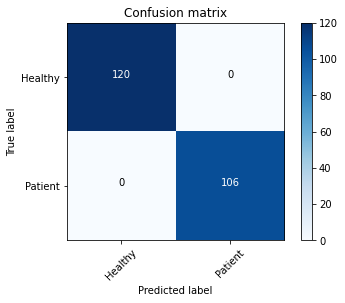

**************************************************
Random Forest Confusion matrix, without normalization


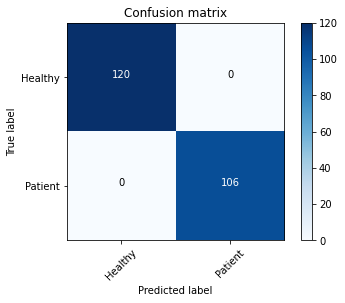

**************************************************


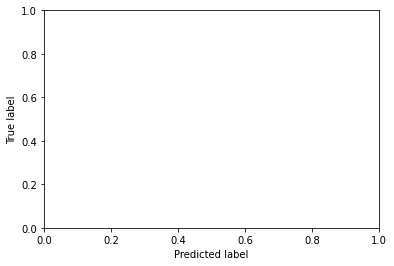

In [44]:
for (cm,model) in zip(confusionMatrices,xLables) :
  print(model,end=" ")
  plot_confusion_matrix(cm,['Healthy', 'Patient'])
  print(50*"*")

## Ploting Graph Of All Model Performances 

### Ploting Simple Trade Line Graph

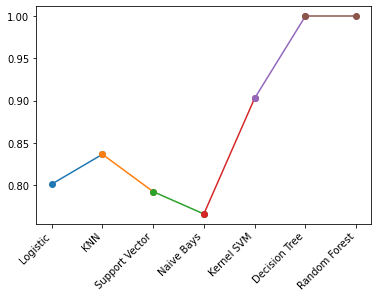

In [42]:
# Ploting a trade simple line graph which shows the change from one model to another model
for i in range(1,7) :
  xPoint = [xCord[i-1],xCord[i]]
  yPoint = [yCord[i-1],yCord[i]]
  plt.plot(xPoint,yPoint,marker='o') 
# plt.legend([xLables])

plt.xticks(xCord,xLables)
plt.xticks(rotation=45, ha="right")

plt.show()

### Ploting Simple Bar Chard 

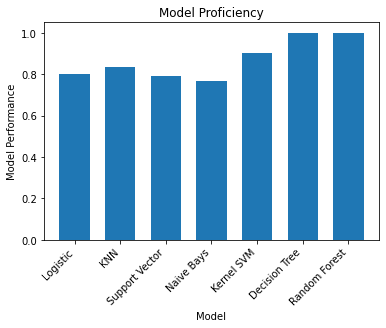

In [43]:
width = 0.1
plt.xticks(xCord,xLables)
plt.xticks(rotation=45, ha="right")

plt.bar(xCord,yCord, width)
plt.title('Model Proficiency')
plt.xlabel('Model')
plt.ylabel('Model Performance')

plt.show()